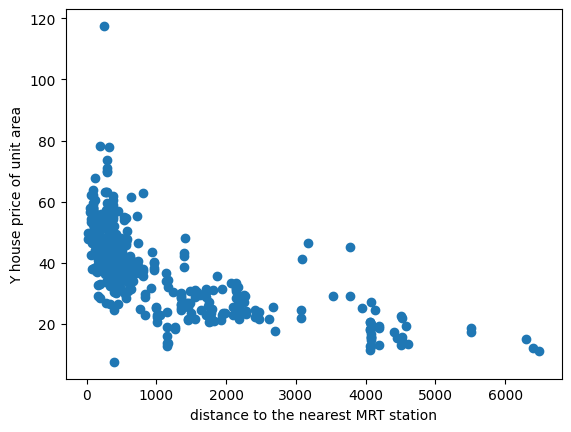

In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
file_name = 'Real estate.csv'


dataset = pandas.read_csv(file_name)
dis_nearest_mrt = dataset['X3 distance to the nearest MRT station']
y = dataset['Y house price of unit area']
house_age = dataset['X2 house age']
fig, ax = plt.subplots(1,1)
ax.set_ylabel('Y house price of unit area')
ax.set_xlabel('distance to the nearest MRT station')
ax.scatter(dis_nearest_mrt, y)

In [25]:
# split dataset into test and train datasets
# 80 percentis will be for train and rest is for test
eighty_pct = 0.8*dataset.shape[0]
#X = dataset.drop('Y house price of unit area', axis=1)
train = dataset.loc[:eighty_pct-1, :]
test_set = dataset.loc[eighty_pct:, :]
y_train = train['Y house price of unit area'].values
X_train = train.drop('Y house price of unit area', axis=1).values
X_train.shape


def compute_squared_errors_cost(X, y, w, b):
    
    cost = 0.0
    m = X.shape[0]
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i])**2
    cost = cost / (1/(2*m))
    return cost
w = [3, 5, 2, 1, 4, 2, 1]

test_c = compute_squared_errors_cost(X_train, y_train, w, 1)

def compute_gradient_lg(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    print('X', X[3, 3])
    for i in range(m):
        f_wb_i = np.dot(X[i], b)
        error = f_wb_i - y[i]
        for j in range(n):
            print(i,j)
            dj_dw[j] += dj_dw[j] + error * X[i,j]
        dj_db += dj_db + error
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

def find_best_parameter(X, y, alpha, iters, w, b):
    m,n = X.shape
    for i in range(m):
        dj_dw, dj_db = compute_gradient_lg(X, y, w, b)
        b = b - alpha * dj_db
        for j in (n):
            w[j] = w[j] - alpha * dj_dw
    
    return {"final_w": w, "final_b": b}
            
w_guess = [3, 10, 23, 7, 2, 13, 4]
finalwtf = find_best_parameter(X_train, y_train, 0.1, 100, w_guess, 20)

X 561.9845


ValueError: setting an array element with a sequence.